In [1]:
!pip install seaborn spotipy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 24.4 MB/s eta 0:00:00


In [2]:
!pip install rapidfuzz --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import re
from rapidfuzz import fuzz
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [6]:
df = pd.read_csv('dataset.csv')
print("Dataset shape:", df.shape)
print("\nDataset columns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (114000, 21)

Dataset columns: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

First few rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.isnull().sum().sum()

np.int64(3)

In [8]:
df = df.dropna()

In [9]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
  print('no dupes')
else:
    df = df.drop_duplicates()

no dupes


In [10]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
df.dtypes

,0
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


In [12]:
audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
    'time_signature'
]

In [13]:
# Reset index
df = df.reset_index(drop=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [14]:
features_to_use = [feature for feature in audio_features if feature in df.columns]
print("Features available for modeling:", features_to_use)

Features available for modeling: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


In [15]:
df[features_to_use].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,1.139990e+05,113999.000000
mean,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,2.280312e+05,3.904034
std,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,1.072961e+05,0.432623
min,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000e+03,0.000000
25%,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,1.740660e+05,4.000000
50%,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,2.129060e+05,4.000000
75%,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,2.615060e+05,4.000000
max,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.237295e+06,5.000000


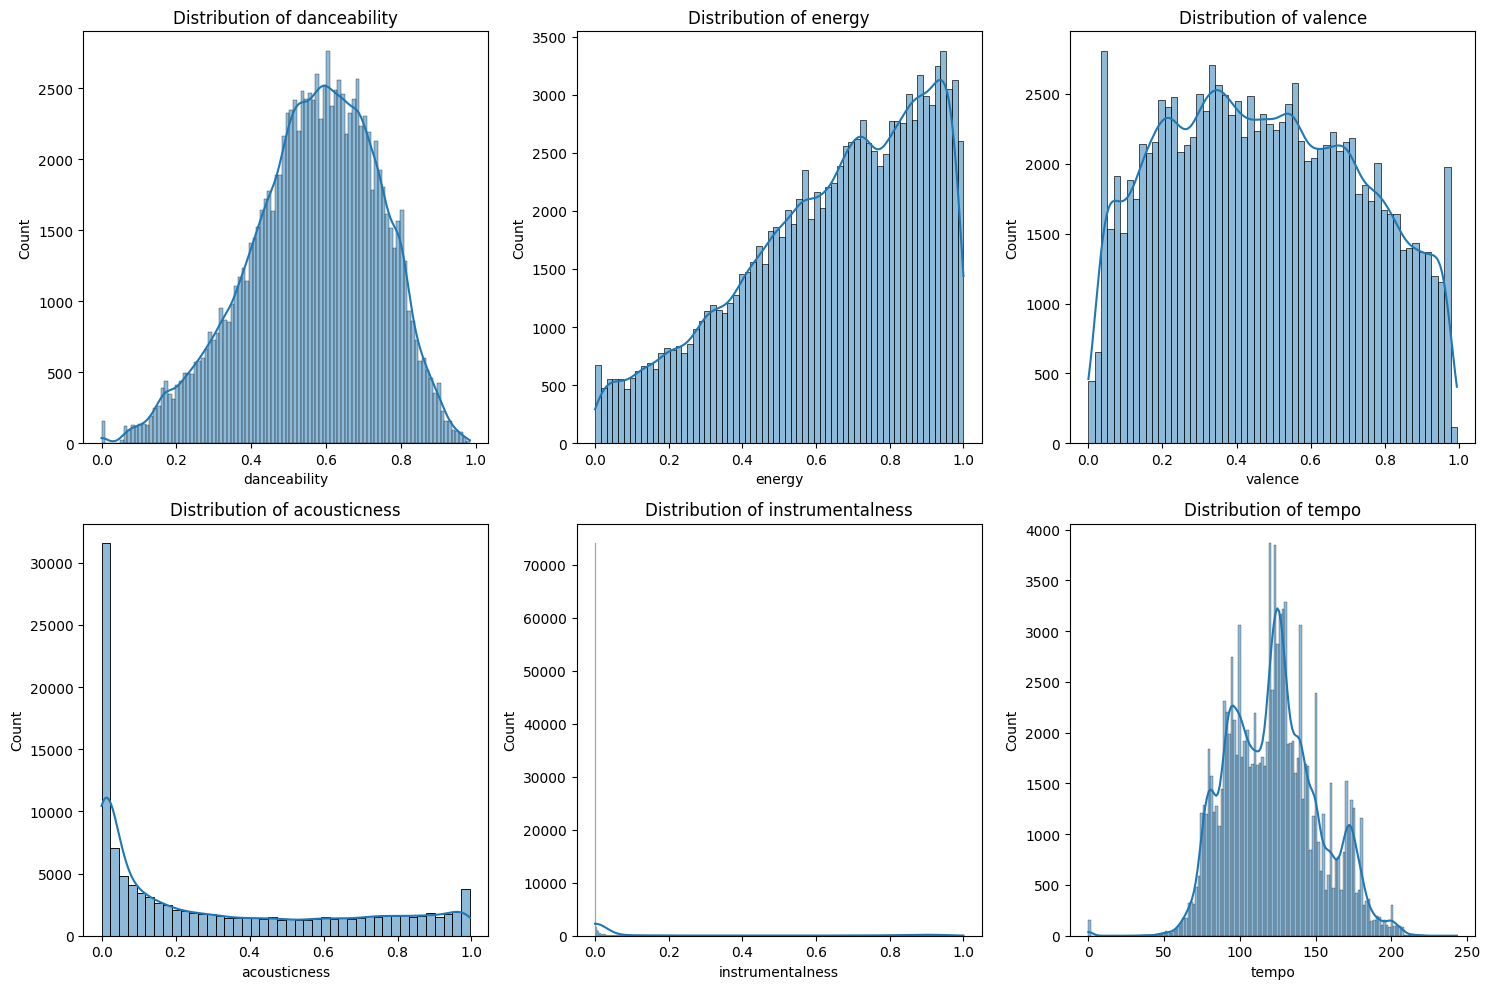

In [16]:
# Visualize the distribution of key features
plt.figure(figsize=(15, 10))

# Select key features to visualize
viz_features = [f for f in ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'tempo']
                if f in features_to_use]

for i, feature in enumerate(viz_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

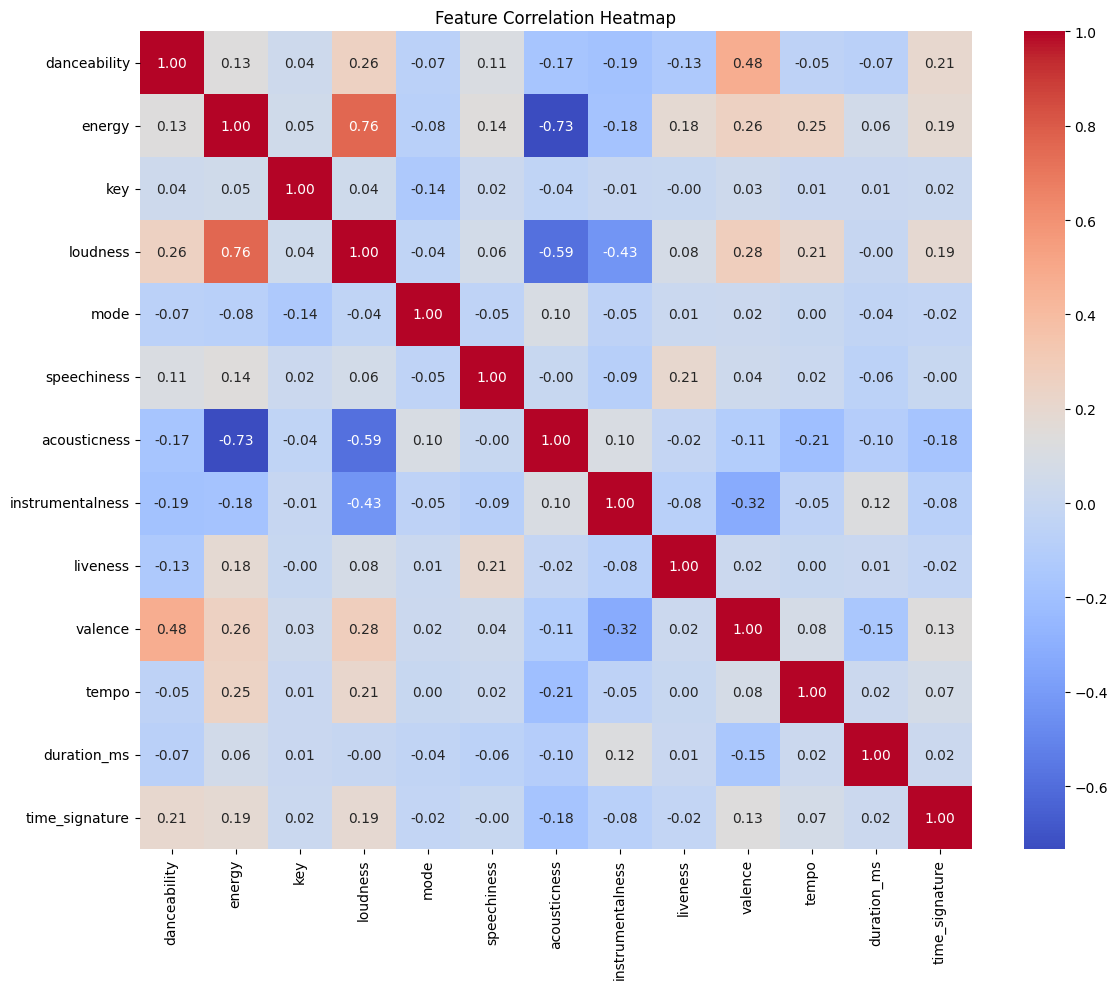

In [17]:
# Feature Correlation
plt.figure(figsize=(12, 10))
correlation_matrix = df[features_to_use].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [18]:
def get_track_features(song_titles, df):
    """
    Find tracks by title in the existing dataset and get their audio features

    Parameters:
    - song_titles: List of song titles to search for
    - dataset: DataFrame containing the Spotify dataset

    Returns:
    - DataFrame with matched songs and their audio features
    """
    results = []

    # For each liked song title
    for title in song_titles:
        # Search for matching or similar titles in the dataset
        # Convert both to lowercase for case-insensitive matching
        matches = df[df['track_name'].str.lower().str.contains(title.lower(), na=False)]

        if len(matches) == 0:
            print(f"Could not find track: {title}")
            continue

        # Use the first match
        track = matches.iloc[0]

        # Create a dictionary with track info and features
        track_data = {
            'track_id': track['track_id'] if 'track_id' in df.columns else f"unknown_{len(results)}",
            'track_name': track['track_name'],
            'artist': track['artists'] if 'artists' in df.columns else 'Unknown',
            'popularity': track['popularity'] if 'popularity' in df.columns else 50
        }

        # Add audio features
        for feature in features_to_use:
            if feature in track:
                track_data[feature] = track[feature]
            else:
                # Use mean value from dataset if feature not available
                track_data[feature] = df[feature].mean() if feature in df.columns else 0

        results.append(track_data)

    # Create DataFrame from results
    liked_songs_df = pd.DataFrame(results)

    # If no tracks were found, return empty DataFrame
    if len(liked_songs_df) == 0:
        print("Could not find any of the liked songs in the dataset.")
        return pd.DataFrame()

    print(f"Found {len(liked_songs_df)} of {len(song_titles)} liked songs in the dataset")
    return liked_songs_df

In [19]:
# extract features for modelling
features_df = df[features_to_use]

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print("Features Scaled")

Features Scaled


In [21]:
pca = PCA(n_components = 0.9)
pca_result = pca.fit_transform(scaled_features)

In [22]:
# Print PCA information
explained_variance = sum(pca.explained_variance_ratio_)
print(f"PCA reduced dimensions from {len(features_to_use)} to {pca_result.shape[1]}")
print(f"Total explained variance: {explained_variance:.2f}")
print("\nExplained variance by component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f} ({var*100:.2f}%)")

PCA reduced dimensions from 13 to 10
Total explained variance: 0.93

Explained variance by component:
Component 1: 0.2281 (22.81%)
Component 2: 0.1180 (11.80%)
Component 3: 0.0976 (9.76%)
Component 4: 0.0894 (8.94%)
Component 5: 0.0756 (7.56%)
Component 6: 0.0698 (6.98%)
Component 7: 0.0681 (6.81%)
Component 8: 0.0644 (6.44%)
Component 9: 0.0608 (6.08%)
Component 10: 0.0573 (5.73%)


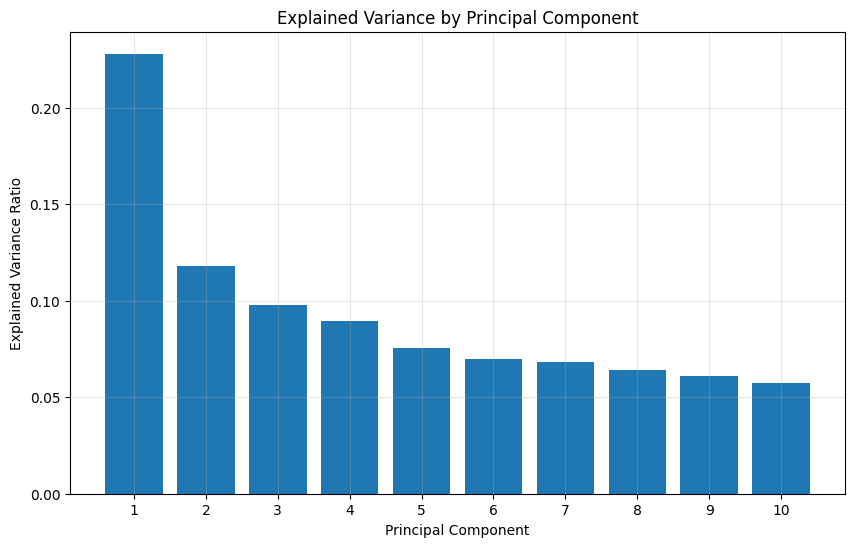

In [23]:
# Cell 12: Visualize PCA components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(alpha=0.3)
plt.show()

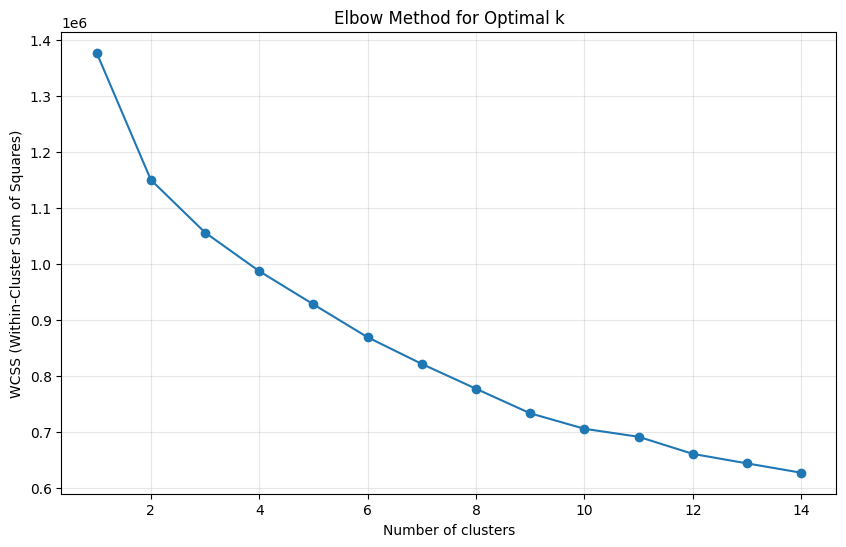

In [24]:
# Determine Optimal Number of Clusters using Elbow Method
wcss = []
k_range = range(1, 15)

for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  kmeans.fit(pca_result)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True, alpha=0.3)
plt.show()

In [34]:
# Set number of clusters based on Elbow Method
n_clusters = 10 # You can adjust this based on the Elbow Method (find number of clusters where the curve starts to flatten out)

In [35]:
# Apply K Means Clustering
kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init = 10)
clusters = kmeans.fit_predict(pca_result)

In [36]:
df['cluster'] = clusters

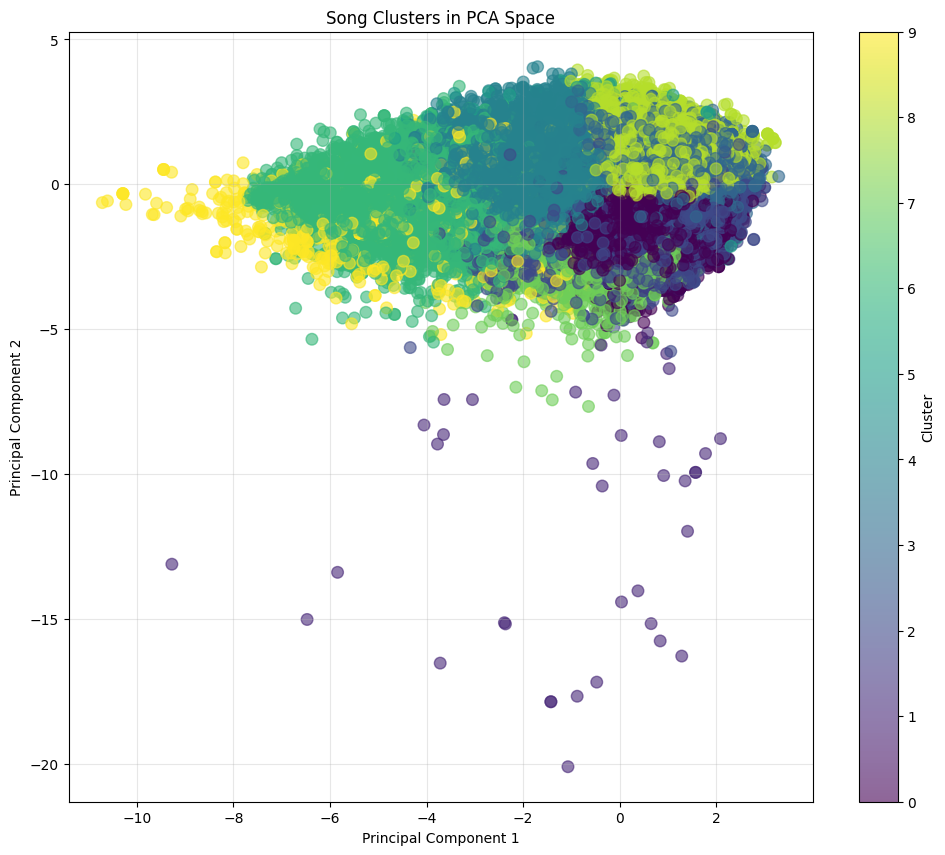

In [37]:
# Visualize clusters in 2D PCA space
if pca_result.shape[1] >= 2:
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=70)
    plt.colorbar(scatter, label='Cluster')
    plt.title('Song Clusters in PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True, alpha=0.3)
    plt.show()

In [38]:
# Calculate Cluster Statistics
cluster_stats = df.groupby('cluster')[features_to_use].mean()
print("Cluser Statistics: ")
cluster_stats

Cluser Statistics: 


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.431723,0.824118,5.129083,-5.236859,0.766129,0.087559,0.073745,0.055587,0.201064,0.340922,146.752979,2.394673e+05,3.930411
1,0.494979,0.630862,5.476190,-10.293548,0.642857,0.080040,0.354888,0.304286,0.210814,0.417543,119.285048,3.070508e+06,3.523810
2,0.514251,0.760736,5.316221,-6.976059,0.686042,0.085994,0.287741,0.067658,0.753951,0.517051,123.472787,2.407309e+05,3.964361
3,0.665886,0.721762,6.160146,-6.337890,0.000000,0.095117,0.193515,0.027163,0.172424,0.583801,119.261849,2.175903e+05,3.990721
4,0.510141,0.349268,4.943360,-11.148730,0.787154,0.050110,0.710974,0.031661,0.159502,0.374201,113.138056,2.149991e+05,3.827305
5,0.574487,0.670115,5.076923,-11.191175,0.689527,0.838525,0.736287,0.008717,0.658484,0.440856,101.589100,2.180411e+05,3.607970
6,0.368447,0.175277,4.829436,-20.892718,0.648114,0.052259,0.870389,0.813509,0.153544,0.194651,106.177318,2.160252e+05,3.800172
7,0.592459,0.741353,5.602102,-8.621625,0.519332,0.068607,0.095465,0.788795,0.166719,0.332862,125.955984,3.012272e+05,3.963776
8,0.680171,0.713901,5.013747,-6.458766,1.000000,0.083325,0.224565,0.020977,0.167807,0.670277,118.312435,2.062475e+05,3.989616


In [39]:
if 'track_genre' in df.columns:
  for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    print(f"\nCluster {cluster} - Top Genres: ")
    print(cluster_data['track_genre'].value_counts().head(30))


Cluster 0 - Top Genres: 
track_genre
metalcore        687
death-metal      601
hardstyle        578
dubstep          555
heavy-metal      538
grunge           522
metal            513
happy            476
black-metal      471
grindcore        447
drum-and-bass    439
dub              422
punk             404
hardcore         403
j-idol           392
world-music      389
punk-rock        379
hard-rock        376
power-pop        376
industrial       354
j-rock           352
goth             333
garage           314
gospel           300
alt-rock         283
emo              258
alternative      256
j-pop            246
groove           240
rock             238
Name: count, dtype: int64

Cluster 1 - Top Genres: 
track_genre
breakbeat         8
sleep             6
folk              4
classical         4
chicago-house     3
guitar            2
k-pop             2
minimal-techno    2
detroit-techno    2
disco             1
idm               1
drum-and-bass     1
dancehall         1
indian  

In [40]:
def recommend_songs(liked_songs, df, top_n=10):
    """
    Recommend songs based on a list of liked song titles

    Parameters:
    - liked_songs: List of song titles that the user likes
    - top_n: Number of recommendations to return

    Returns:
    - DataFrame with recommended songs
    """
    # Get features for liked songs
    liked_songs_df = get_track_features(liked_songs, df)

    if liked_songs_df.empty:
        return pd.DataFrame()

    print(f"Found {len(liked_songs_df)} of {len(liked_songs)} liked songs")

    # Get features for liked songs
    liked_features = liked_songs_df[features_to_use].values

    # Scale the features
    liked_scaled = scaler.transform(liked_features)

    # Apply PCA transformation
    liked_pca = pca.transform(liked_scaled)

    # Predict clusters for liked songs
    liked_clusters = kmeans.predict(liked_pca)

    # Count songs in each cluster to determine user preferences
    cluster_counts = np.bincount(liked_clusters, minlength=n_clusters)
    cluster_weights = cluster_counts / len(liked_clusters)

    print("User preference by cluster:")
    for cluster, weight in enumerate(cluster_weights):
        print(f"Cluster {cluster}: {weight:.2f}")

    # Get top clusters (those with at least one liked song)
    top_clusters = np.where(cluster_counts > 0)[0]

    # Initialize nearest neighbors model for each feature
    knn = NearestNeighbors(n_neighbors=min(top_n+len(liked_songs_df), len(df)), algorithm='auto')
    knn.fit(scaled_features)

    # Find the most similar songs to each liked song
    all_distances = []
    all_indices = []

    for i, liked_song in enumerate(liked_scaled):
        distances, indices = knn.kneighbors(liked_song.reshape(1, -1))

        # Weight distances by cluster preference
        song_cluster = liked_clusters[i]
        weighted_distances = distances * (1 / max(cluster_weights[song_cluster], 0.1))

        all_distances.extend(weighted_distances.flatten())
        all_indices.extend(indices.flatten())

    # Create a DataFrame with distances and indices
    recommendations_df = pd.DataFrame({
        'index': all_indices,
        'track_name': df.loc[all_indices, 'track_name'],
        'distance': all_distances
    })

    # Remove duplicates and sort by distance
    recommendations_df = recommendations_df.drop_duplicates(subset='index')
    recommendations_df = recommendations_df.sort_values('distance')

    # Get track IDs of liked songs to exclude them from recommendations
    liked_ids = set(liked_songs_df['track_id'])

    # Get the recommendations
    recommended_indices = []
    seen_names = set()
    for idx in recommendations_df['index']:
        # Skip if we already have enough recommendations
        if len(recommended_indices) >= top_n:
            break

        # Get the recommended track ID and track Name
        rec_row = df.iloc[idx]
        rec_id = df.loc[idx, 'track_id'] if 'track_id' in df.columns else None
        rec_name = rec_row['track_name'].strip().lower() if 'track_name' in df.columns else None


        # Skip if this is a liked song
        if rec_id in liked_ids:
            continue

        # Skip if the track name is already recommended
        # Fuzzy duplicate check
        is_duplicate = any(fuzz.ratio(rec_name, seen) > 85 for seen in seen_names)
        if is_duplicate:
          continue

        seen_names.add(rec_name)
        recommended_indices.append(idx)

    # Get the recommended tracks
    recommendations = df.iloc[recommended_indices]

    # Select columns to display
    display_cols = ['track_name', 'artists', 'album_name', 'popularity', 'track_genre']
    display_cols = [col for col in display_cols if col in df.columns]

    return recommendations[display_cols].head(top_n)

In [41]:
# List of liked songs
liked = [
    "Another Brick in the Wall, Pt. 2",
    "Time",
    "Wish You Were Here",
    "Breathe",
    "Comfortably Numb",
    "Breathe (In the Air)",
    "Time",
    "The Great Gig in the Sky",
    "Money",
    "Hey You"
]

recommendations = recommend_songs(liked, df, top_n = 10)
print("\nRecommended Songs: ")
recommendations

Could not find track: Breathe (In the Air)
Could not find track: The Great Gig in the Sky
Found 8 of 10 liked songs in the dataset
Found 8 of 10 liked songs
User preference by cluster:
Cluster 0: 0.38
Cluster 1: 0.00
Cluster 2: 0.12
Cluster 3: 0.00
Cluster 4: 0.25
Cluster 5: 0.00
Cluster 6: 0.00
Cluster 7: 0.00
Cluster 8: 0.25
Cluster 9: 0.00

Recommended Songs: 


,track_name,artists,album_name,popularity,track_genre
798,This Time Tomorrow,Brandi Carlile,In These Silent Days,60,acoustic
3114,Hey You,Disturbed,Rock Brandneu,1,alternative
47259,Fuel,Metallica,Reload,71,hard-rock
61819,前説ADvance,Seiko Oomori,超天獄,21,j-idol
62553,風が吹く街,ラックライフ,風が吹く街,48,j-pop
85677,Amnesia,Say Ocean,Mejores Tiempos,37,punk-rock
61814,against,Sayaka Yamamoto,ゼロ ユニバース,19,j-idol
17716,Deviant,DEADLIFE,Bionic Chrysalis,43,club
61984,Seize the day!!,PassCode,Locus,18,j-idol
12402,聖馬力諾之心,Dear Jane,聖馬力諾之心,49,cantopop
